In [30]:
# 估计器

2.9.1
sys.version_info(major=3, minor=9, micro=7, releaselevel='final', serial=0)
matplotlib 3.5.2
numpy 1.23.0
pandas 1.4.3
sklearn 1.1.1
tensorflow 2.9.1
keras.api._v2.keras 2.9.0


In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

In [31]:
# https://storage.googleapis.com/tf-datasets/titanic/train.csv
# https://storage.googleapis.com/tf-datasets/titanic/eval.csv
train_file = "./data/titanic/train.csv"
eval_file = "./data/titanic/eval.csv"
train_df = pd.read_csv(train_file)
eval_df = pd.read_csv(eval_file)

print(train_df.head())
print(eval_df.head())

   survived     sex   age  n_siblings_spouses  parch     fare  class     deck  \
0         0    male  22.0                   1      0   7.2500  Third  unknown   
1         1  female  38.0                   1      0  71.2833  First        C   
2         1  female  26.0                   0      0   7.9250  Third  unknown   
3         1  female  35.0                   1      0  53.1000  First        C   
4         0    male  28.0                   0      0   8.4583  Third  unknown   

   embark_town alone  
0  Southampton     n  
1    Cherbourg     n  
2  Southampton     y  
3  Southampton     n  
4   Queenstown     y  
   survived     sex   age  n_siblings_spouses  parch     fare   class  \
0         0    male  35.0                   0      0   8.0500   Third   
1         0    male  54.0                   0      0  51.8625   First   
2         1  female  58.0                   0      0  26.5500   First   
3         1  female  55.0                   0      0  16.0000  Second   
4         

In [32]:
# 提取目标值
y_train = train_df.pop('survived')
y_eval = eval_df.pop('survived')
print(train_df.head())
print('-' * 50)
print(eval_df.head())
print('-' * 50)
print(y_train.head())
print('-' * 50)
print(y_eval.head())

      sex   age  n_siblings_spouses  parch     fare  class     deck  \
0    male  22.0                   1      0   7.2500  Third  unknown   
1  female  38.0                   1      0  71.2833  First        C   
2  female  26.0                   0      0   7.9250  Third  unknown   
3  female  35.0                   1      0  53.1000  First        C   
4    male  28.0                   0      0   8.4583  Third  unknown   

   embark_town alone  
0  Southampton     n  
1    Cherbourg     n  
2  Southampton     y  
3  Southampton     n  
4   Queenstown     y  
--------------------------------------------------
      sex   age  n_siblings_spouses  parch     fare   class     deck  \
0    male  35.0                   0      0   8.0500   Third  unknown   
1    male  54.0                   0      0  51.8625   First        E   
2  female  58.0                   0      0  26.5500   First        C   
3  female  55.0                   0      0  16.0000  Second  unknown   
4    male  34.0         

In [33]:
print(train_df.describe())

              age  n_siblings_spouses       parch        fare
count  627.000000          627.000000  627.000000  627.000000
mean    29.631308            0.545455    0.379585   34.385399
std     12.511818            1.151090    0.792999   54.597730
min      0.750000            0.000000    0.000000    0.000000
25%     23.000000            0.000000    0.000000    7.895800
50%     28.000000            0.000000    0.000000   15.045800
75%     35.000000            1.000000    0.000000   31.387500
max     80.000000            8.000000    5.000000  512.329200


In [34]:
print(train_df.shape, eval_df.shape)

(627, 9) (264, 9)


<AxesSubplot:>

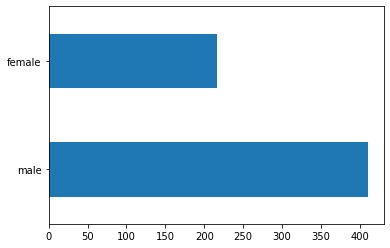

In [35]:
train_df.sex.value_counts().plot(kind='barh')

<AxesSubplot:>

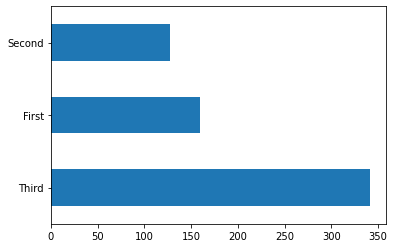

In [36]:
train_df['class'].value_counts().plot(kind='barh')

In [37]:
print(pd.concat([train_df, y_train], axis=1).groupby('age').survived.mean())

age
0.75     1.000000
0.83     1.000000
1.00     0.333333
2.00     0.333333
3.00     1.000000
           ...   
66.00    0.000000
70.00    0.000000
70.50    0.000000
71.00    0.000000
80.00    1.000000
Name: survived, Length: 76, dtype: float64


In [38]:
# 离散型特征
categorical_columns = ['sex', 'n_siblings_spouses', 'parch', 'class',
                       'deck', 'embark_town', 'alone']
# 连续型特征
numeric_columns = ['age', 'fare']
# 离散特征处理
feature_columns = []
for categorical_column in categorical_columns:
    vocab = train_df[categorical_column].unique()
    print(categorical_column, vocab)
    feature_columns.append(
        # indicator_column做one-hot编码
        tf.feature_column.indicator_column(
            tf.feature_column.categorical_column_with_vocabulary_list(
                categorical_column, vocab)))
# 离散特征处理
for numeric_column in numeric_columns:
    feature_columns.append(
        tf.feature_column.numeric_column(
            numeric_column, dtype=tf.float32))
# 特征类别
print(feature_columns)

sex ['male' 'female']
n_siblings_spouses [1 0 3 4 2 5 8]
parch [0 1 2 5 3 4]
class ['Third' 'First' 'Second']
deck ['unknown' 'C' 'G' 'A' 'B' 'D' 'F' 'E']
embark_town ['Southampton' 'Cherbourg' 'Queenstown' 'unknown']
alone ['n' 'y']
[IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0)), IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0)), IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0)), IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0)), IndicatorColumn(categorical_column=VocabularyListCatego

In [39]:
print(dict(train_df))

{'sex': 0        male
1      female
2      female
3      female
4        male
        ...  
622      male
623      male
624    female
625    female
626      male
Name: sex, Length: 627, dtype: object, 'age': 0      22.0
1      38.0
2      26.0
3      35.0
4      28.0
       ... 
622    28.0
623    25.0
624    19.0
625    28.0
626    32.0
Name: age, Length: 627, dtype: float64, 'n_siblings_spouses': 0      1
1      1
2      0
3      1
4      0
      ..
622    0
623    0
624    0
625    1
626    0
Name: n_siblings_spouses, Length: 627, dtype: int64, 'parch': 0      0
1      0
2      0
3      0
4      0
      ..
622    0
623    0
624    0
625    2
626    0
Name: parch, Length: 627, dtype: int64, 'fare': 0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.4583
        ...   
622    10.5000
623     7.0500
624    30.0000
625    23.4500
626     7.7500
Name: fare, Length: 627, dtype: float64, 'class': 0       Third
1       First
2       Third
3       First
4       Third
     

In [40]:
print(y_train)

0      0
1      1
2      1
3      1
4      0
      ..
622    0
623    0
624    1
625    0
626    0
Name: survived, Length: 627, dtype: int64


In [41]:
def make_dataset(data_df, label_df, epochs=10, shuffle=True, batch_size=32):
    dataset = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))
    # dataset = tf.data.Dataset.from_tensor_slices((data_df, label_df))
    if shuffle:
        dataset = dataset.shuffle(10000)
    dataset = dataset.repeat(epochs).batch(batch_size)
    return dataset


train_dataset = make_dataset(train_df, y_train, batch_size=5)

In [42]:
list(train_dataset.take(1).as_numpy_iterator())
##%
print(feature_columns)
print('-' * 50)
# A layer that produces a dense Tensor based on given feature_columns
for x, y in train_dataset.take(1):
    # 特征类型
    age_column = feature_columns[7]
    gender_column = feature_columns[0]
    # DenseFeatures进行转换
    print(keras.layers.DenseFeatures(age_column)(x).numpy())
    print(keras.layers.DenseFeatures(gender_column)(x))  # 变为one-hot编码

[IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0)), IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0)), IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0)), IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0)), IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0)), IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='embark_town', voca

In [43]:
# keras.layers.DenseFeature
for x, y in train_dataset.take(1):
    print(keras.layers.DenseFeatures(feature_columns)(x))

tf.Tensor(
[[18.      1.      0.      1.      0.      0.      1.      0.      0.
   0.      0.      0.      0.      0.      1.      0.      0.      0.
  20.2125  1.      0.      0.      0.      0.      0.      0.      0.
   1.      0.      0.      0.      0.      1.      0.    ]
 [27.      0.      1.      0.      1.      0.      0.      0.      0.
   0.      0.      1.      0.      0.      0.      1.      0.      0.
  76.7292  0.      1.      0.      0.      0.      0.      0.      1.
   0.      0.      0.      0.      0.      1.      0.    ]
 [19.      0.      1.      1.      0.      0.      1.      0.      0.
   0.      0.      0.      0.      0.      1.      0.      0.      0.
   7.8958  0.      1.      0.      0.      0.      0.      0.      1.
   0.      0.      0.      0.      0.      1.      0.    ]
 [28.      1.      0.      1.      0.      0.      1.      0.      0.
   0.      0.      0.      0.      0.      0.      0.      1.      0.
  23.25    0.      0.      0.      0.     

In [44]:
# DenseFeatures可以直接将非数值类型特征转为数值类型特征
model = keras.models.Sequential([
    keras.layers.DenseFeatures(feature_columns),  # 传入feature_columns，直接处理所有特征
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(2, activation='softmax'), ])
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.SGD(learning_rate=0.005), metrics=['accuracy'])

In [45]:
# 第一种方式 model.fit()
train_dataset = make_dataset(train_df, y_train, epochs=100)
eval_dataset = make_dataset(eval_df, y_eval, epochs=100, shuffle=False)  #验证集
# train_dataset里边包含特征和目标，feature_columns只处理特征
history = model.fit(train_dataset,
                    validation_data=eval_dataset,
                    steps_per_epoch=19,
                    validation_steps=8,
                    epochs=100)

Epoch 1/100
19/19 [==============================] - 1s 14ms/step - loss: 1.4186 - accuracy: 0.5987 - val_loss: 0.8347 - val_accuracy: 0.6289
Epoch 2/100
19/19 [==============================] - 0s 2ms/step - loss: 0.9609 - accuracy: 0.6168 - val_loss: 0.7428 - val_accuracy: 0.6641
Epoch 3/100
19/19 [==============================] - 0s 3ms/step - loss: 0.8503 - accuracy: 0.6332 - val_loss: 0.6139 - val_accuracy: 0.6914
Epoch 4/100
19/19 [==============================] - 0s 2ms/step - loss: 0.6204 - accuracy: 0.6793 - val_loss: 0.6402 - val_accuracy: 0.6641
Epoch 5/100
19/19 [==============================] - 0s 3ms/step - loss: 0.6205 - accuracy: 0.6760 - val_loss: 0.6413 - val_accuracy: 0.6484
Epoch 6/100
19/19 [==============================] - 0s 3ms/step - loss: 0.6175 - accuracy: 0.6809 - val_loss: 0.6178 - val_accuracy: 0.6680
Epoch 7/100
19/19 [==============================] - 0s 3ms/step - loss: 0.7184 - accuracy: 0.6398 - val_loss: 0.6002 - val_accuracy: 0.6758
Epoch 8/100


19/19 [==============================] - 0s 3ms/step - loss: 0.5560 - accuracy: 0.7105 - val_loss: 0.5435 - val_accuracy: 0.7148
Epoch 42/100
19/19 [==============================] - 0s 3ms/step - loss: 0.5410 - accuracy: 0.7484 - val_loss: 0.5256 - val_accuracy: 0.7305
Epoch 43/100
19/19 [==============================] - 0s 3ms/step - loss: 0.5201 - accuracy: 0.7500 - val_loss: 0.5284 - val_accuracy: 0.7109
Epoch 44/100
19/19 [==============================] - 0s 3ms/step - loss: 0.5442 - accuracy: 0.7516 - val_loss: 0.5212 - val_accuracy: 0.7305
Epoch 45/100
19/19 [==============================] - 0s 2ms/step - loss: 0.5365 - accuracy: 0.7303 - val_loss: 0.5246 - val_accuracy: 0.7266
Epoch 46/100
19/19 [==============================] - 0s 2ms/step - loss: 0.5390 - accuracy: 0.7549 - val_loss: 0.5188 - val_accuracy: 0.7344
Epoch 47/100
19/19 [==============================] - 0s 3ms/step - loss: 0.5331 - accuracy: 0.7434 - val_loss: 0.5422 - val_accuracy: 0.7227
Epoch 48/100
19/19 

Epoch 99/100
19/19 [==============================] - 0s 2ms/step - loss: 0.5063 - accuracy: 0.7796 - val_loss: 0.5033 - val_accuracy: 0.7422
Epoch 100/100
19/19 [==============================] - 0s 2ms/step - loss: 0.5048 - accuracy: 0.7829 - val_loss: 0.4838 - val_accuracy: 0.7500


In [46]:
# 第二种方式 model->estimator->train
# TensorFlow的已知bug未修复
estimator = keras.estimator.model_to_estimator(model)
# input_fn输入必须是函数
estimator.train(input_fn=lambda: make_dataset(train_df, y_train, epochs=100), steps=1)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using the Keras model provided.
Note that this doesn't affect the state of the model instance you passed as `keras_model` argument.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\MYTEMP~1\\tmpl4qth4ge', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master

D:\Python39\lib\site-packages\keras\backend.py:450: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn('`tf.keras.backend.set_learning_phase` is deprecated and '


ValueError: Unexpectedly found an instance of type `<class 'dict'>`. Expected a symbolic tensor instance.